# DATA PREPROCESSING - Predicting Solar Installations for Sustainability and Ecological Impact 

In [116]:
#Team members:Bhavana Meravanige Veerappa, Raksha Ravishankar, Sonia Bathla
#importing all the necessary libraries
from scipy.stats import zscore
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [117]:
#loading the Data Set
solar_data = pd.read_csv(r"C:\HOME\SJSU\Solar_Data\Solar_Footprints_V2_5065925295652909767.csv")

In [118]:
solar_data.head(2)

,OBJECTID,County,Acres,Install Type,Urban or Rural,Combined Class,Distance to Substation (Miles) GTET 100 Max Voltage,Percentile (GTET 100 Max Voltage),Substation Name GTET 100 Max Voltage,HIFLD ID (GTET 100 Max Voltage),...,Percentile (GTET 200 Max Voltage),Substation Name GTET 200 Max Voltage,HIFLD ID (GTET 200 Max Voltage),Distance to Substation (Miles) CAISO,Percentile (CAISO),Substation CASIO Name,HIFLD ID (CAISO),Solar Technoeconomic Intersection,Shape__Area,Shape__Length
0,1,Alameda County,1.672639,Rooftop,Urban,Rooftop - Urban,0.162732,0 to 25th,Dixon Landing,309200.0,...,0 to 25th,Los Esteros,310258.0,2.272283,0 to 25th,Los Esteros,310258.0,Within,6768.954679,365.801336
1,2,Alameda County,1.897078,Rooftop,Urban,Rooftop - Urban,0.226728,0 to 25th,Dixon Landing,309200.0,...,0 to 25th,Los Esteros,310258.0,2.392816,0 to 25th,Los Esteros,310258.0,Within,7677.228982,366.909878


In [119]:
#Encoding the Labels
solar_data = solar_data.rename(columns={
    'OBJECTID': 'ID',
    'County': 'County',
    'Acres': 'Acres',
    'Install Type': 'InstallType',
    'Urban or Rural': 'UrbanRural',
    'Combined Class': 'Class',
    'Distance to Substation (Miles) GTET 100 Max Voltage': 'DistSub_100',
    'Percentile (GTET 100 Max Voltage)': 'Percent_100',
    'Substation Name GTET 100 Max Voltage': 'Substation_100',
    'HIFLD ID (GTET 100 Max Voltage)': 'HIFLD_100',
    'Distance to Substation (Miles) GTET 200 Max Voltage': 'DistSub_200',
    'Percentile (GTET 200 Max Voltage)': 'Percent_200',
    'Substation Name GTET 200 Max Voltage': 'Substation_200',
    'HIFLD ID (GTET 200 Max Voltage)': 'HIFLD_200',
    'Distance to Substation (Miles) CAISO': 'DistSub_CAISO',
    'Percentile (CAISO)': 'Percent_CAISO',
    'Substation CASIO Name': 'Substation_CAISO',
    'HIFLD ID (CAISO)': 'HIFLD_CAISO',
    'Solar Technoeconomic Intersection': 'SolarTech',
    'Shape__Area': 'Area',
    'Shape__Length': 'Length'
})

In [120]:
solar_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5397 entries, 0 to 5396
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                5397 non-null   int64  
 1   County            5397 non-null   object 
 2   Acres             5397 non-null   float64
 3   InstallType       5397 non-null   object 
 4   UrbanRural        5397 non-null   object 
 5   Class             5397 non-null   object 
 6   DistSub_100       5397 non-null   float64
 7   Percent_100       5397 non-null   object 
 8   Substation_100    5397 non-null   object 
 9   HIFLD_100         5255 non-null   float64
 10  DistSub_200       5397 non-null   float64
 11  Percent_200       5397 non-null   object 
 12  Substation_200    5397 non-null   object 
 13  HIFLD_200         5165 non-null   float64
 14  DistSub_CAISO     5397 non-null   float64
 15  Percent_CAISO     5397 non-null   object 
 16  Substation_CAISO  5387 non-null   object 


# Handling Null Values

In [121]:
#finding empty entries
solar_data.isnull().sum()

ID                    0
County                0
Acres                 0
InstallType           0
UrbanRural            0
Class                 0
DistSub_100           0
Percent_100           0
Substation_100        0
HIFLD_100           142
DistSub_200           0
Percent_200           0
Substation_200        0
HIFLD_200           232
DistSub_CAISO         0
Percent_CAISO         0
Substation_CAISO     10
HIFLD_CAISO         217
SolarTech             0
Area                  0
Length                0
dtype: int64

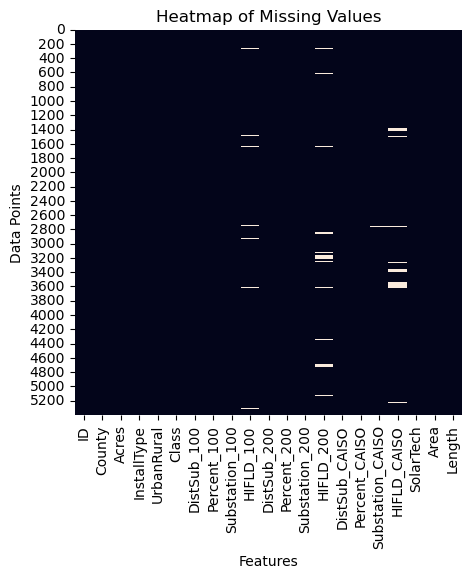

In [122]:
#heatmap to showcase null values
plt.figure(figsize=(5, 5))
sns.heatmap(solar_data.isnull(), cbar=False)

#Adding the labels
plt.title('Heatmap of Missing Values')
plt.xlabel('Features')
plt.ylabel('Data Points')

#Showing the plot
plt.show()

In [123]:
#Imputing unknown ID values-HIFLD_100, HIFLD_200, HIFLD_CAISO to 0 as the fields are in Int
solar_data['HIFLD_100'].fillna(0, inplace=True)
solar_data['HIFLD_200'].fillna(0, inplace=True)
solar_data['HIFLD_CAISO'].fillna(0, inplace=True)

In [125]:
#Imputing unknown Substation_CAISO as 'NaN'
solar_data['Substation_CAISO'].fillna('NaN', inplace=True)

In [126]:
solar_data.isnull().sum()

ID                  0
County              0
Acres               0
InstallType         0
UrbanRural          0
Class               0
DistSub_100         0
Percent_100         0
Substation_100      0
HIFLD_100           0
DistSub_200         0
Percent_200         0
Substation_200      0
HIFLD_200           0
DistSub_CAISO       0
Percent_CAISO       0
Substation_CAISO    0
HIFLD_CAISO         0
SolarTech           0
Area                0
Length              0
dtype: int64

# Checking for Duplicate Entries

In [127]:
#checking for duplicate entries
duplicates = solar_data[solar_data.duplicated(subset='ID', keep=False)]

In [128]:
duplicates

,ID,County,Acres,InstallType,UrbanRural,Class,DistSub_100,Percent_100,Substation_100,HIFLD_100,...,Percent_200,Substation_200,HIFLD_200,DistSub_CAISO,Percent_CAISO,Substation_CAISO,HIFLD_CAISO,SolarTech,Area,Length


# Checking for Unique Entries in Categorical Columns for the Data Consistency

In [132]:
County = solar_data['County'].unique()
County

array(['Alameda', 'Amador', 'Butte', 'Calaveras', 'Colusa',
       'Contra Costa', 'El Dorado', 'Fresno', 'Glenn', 'Humboldt',
       'Imperial', 'Inyo', 'Kern', 'Kings', 'Lake', 'Lassen',
       'Los Angeles', 'Madera', 'Marin', 'Mendocino', 'Merced', 'Mono',
       'Monterey', 'Napa', 'Nevada', 'Orange', 'Placer', 'Plumas',
       'Riverside', 'Sacramento', 'San Benito', 'San Bernardino',
       'San Diego', 'San Francisco', 'San Joaquin', 'San Luis Obispo',
       'San Mateo', 'Santa Barbara', 'Santa Clara', 'Santa Cruz',
       'Shasta', 'Solano', 'Sonoma', 'Stanislaus', 'Sutter', 'Tehama',
       'Tulare', 'Tuolumne', 'Ventura', 'Yolo', 'Yuba'], dtype=object)

In [133]:
#Removing 'County' keyword in County column
solar_data['County'] = solar_data['County'].str.replace(' County', '', regex=False)

In [134]:
InstallType = solar_data['InstallType'].unique()
InstallType

array(['Rooftop', 'Parking', 'Ground'], dtype=object)

In [135]:
UrbanRural =solar_data['UrbanRural'].unique()
UrbanRural

array(['Urban', 'Rural'], dtype=object)

In [136]:
Class =solar_data['Class'].unique()
Class

array(['Rooftop - Urban', 'Parking - Urban', 'Ground - Urban',
       'Ground - Rural', 'Rooftop - Rural', 'Parking - Rural'],
      dtype=object)

In [137]:
Percent_100 = solar_data['Percent_100'].unique()
Percent_100

array(['0 to 25th', '25th to 50th', '50th to 75th', '75th to 100th'],
      dtype=object)

In [138]:
#Replacing the percentile to easily identifiable labels
replace_dict = {
    '0 to 25th': '0-25',
    '25th to 50th': '25-50',
    '50th to 75th': '50-75',
    '75th to 100th': '75-100'
}

#Replacing multiple items using replace_dict
solar_data['Percent_100'] = solar_data['Percent_100'].replace(replace_dict)
solar_data['Percent_200'] = solar_data['Percent_200'].replace(replace_dict)
solar_data['Percent_CAISO']=solar_data['Percent_CAISO'].replace(replace_dict)

In [140]:
Substation_100 = solar_data['Substation_100'].unique()
Substation_100

array(['Dixon Landing', 'Nummi', 'Newark Distribution', 'Newark',
       'Fremont', 'Dumbarton', 'Dumbarton Tap', 'Air Liquide', 'Unknown',
       'Cryogenics', 'Eastshore', 'Las Positas', 'Castro Valley', 'Grant',
       'San Ramon', 'San Leandro U', 'Lawrence Livermore Laboratory',
       'Lawrence Livermore', 'Castro Valley Tap', 'Domtar 2',
       'Domtar #2 Tap', 'Edes', 'Jenney', 'Edes Tap 1', 'Palo Seco',
       'Oakland C', 'Oakland L', 'Oakland D', 'El Cerrito Station G',
       'Rancho Seco', 'Tiger Creek', 'Honcut', 'Wyandotte', 'Tres Vias',
       'Edward C Hyatt', 'Esquon', 'Table Mt.', 'Chico B', 'Notre Dame',
       'Butte', 'Sycamore Creek', 'Nord', 'Camanche Dam', 'Zamora',
       'Homestake', "O'Banion", 'Maxwell',
       'Technical Ecological Services', 'Tassajara',
       'San Ramon Research Cntr.', 'Rossmoor Tap 2', 'Wind Driven',
       'Lakewood', 'Rossmoor', 'Standard Oil 1', 'Lone Tree',
       'Standard Oil 3', 'Standard Oil 5', 'Clayton', 'Meadow Lane',
     

In [141]:
Substation_200 = solar_data['Substation_200'].unique()
Substation_200

array(['Los Esteros', 'Newark Distribution', 'Newark', 'Eastshore',
       'Las Positas', 'Castro Valley', 'San Ramon', 'Lawrence Livermore',
       'Castro Valley Tap', 'Trans Bay Cable Facility', 'Moraga',
       'Embarcadero', 'Sobrante', 'Rancho Seco', 'Tiger Creek', 'Palermo',
       'Table Mt.', 'Edward C Hyatt', 'Glenn', 'Cosumnes', "O'Banion",
       'Maxwell', 'Technical Ecological Services', 'Tassajara',
       'San Ramon Research Cntr.', 'Rossmoor Tap 2', 'Wind Driven',
       'Rossmoor', 'Lone Tree', 'Tesoro', 'Contra Costa',
       'Contra Costa Power', 'Pittsburg', 'Tidewater', 'Bahia', 'Lake',
       'White Rock', 'Unknown', 'Helm', 'Mc Mullin', 'Tranquility',
       'McCall', 'Kearney (New)', 'Pine Flat', 'Panoche', 'Oxford',
       'Herndon', 'Gregg', 'San Luis 3', 'Eastwood', 'Arkansas',
       'Logan Creek', 'Trinity', 'El Centro', 'Bannister', 'Sonora',
       'Ocotillo Express', 'Midway', 'Barren Ridge',
       'Pine Tree Wind Farm', 'Harper Lake', 'Haas', 'Control

In [142]:
Substation_CAISO = solar_data['Substation_CAISO'].unique()
Substation_CAISO

array(['Los Esteros', 'Martin', 'Cayetano', 'Lockeford', 'Placerville',
       'Honcut', 'Wyandotte', 'Thermalito', 'Table Mt.', 'Glenn',
       'Cortina', 'Clayton', 'Brentwood', 'Martinez', 'Carquinez',
       'Lone Tree', 'Contra Costa', 'Pittsburg', 'Gold Hill', 'Gates',
       'Henrietta', 'Schindler', 'Cantua', 'Leprino', 'Mc Mullin',
       'Kingsburg', 'McCall', 'Helm', 'Tranquility', 'Wahtoke',
       'Kearney (New)', 'Malaga', 'West Fresno', 'Sanger',
       'California Ave', 'Panoche', 'Mendota', 'Newhall', 'Gregg',
       'Oro Loma', 'Big Creek 1', 'Delevan', 'Humboldt',
       'Imperial Valley', 'Bannister', 'Ocotillo Express', 'Inyokern',
       'Valley (VEA)', 'Springville', 'Inyo', 'Whirlwind', 'Antelope',
       'Windhub', 'Kramer', 'Pastoria', 'Taft', 'Wheeler Ridge',
       'Elk Hills', 'Highwind', 'Norco', 'Tevis', 'Grimmway-Malaga',
       'Stockdale', 'Randsburg', 'Lamont', 'Magunden', 'Bakersfield',
       'West Park', 'Midway', 'Kern Power', 'Tupman', 'Columbus'

In [143]:
SolarTech = solar_data['SolarTech'].unique()
SolarTech

array(['Within', 'Outside'], dtype=object)

In [144]:
#Rounding off to 3 decimal places-Mostly would continue with the available data as it showcase original precision.
#solar_data['Acres'] = solar_data['Acres'].round(3)
#solar_data['DistSub_100'] = solar_data['DistSub_100'].round(3)
#solar_data['DistSub_CAISO'] = solar_data['DistSub_CAISO'].round(3)
#solar_data['Area']= solar_data['Area'].round(3)
#solar_data['Length']= solar_data['Length'].round(3)

In [145]:
#changing the float data type of HIFLD to Int data types as they are ID fields.
solar_data['HIFLD_100'] = solar_data['HIFLD_100'].astype(int)
solar_data['HIFLD_200'] = solar_data['HIFLD_200'].astype(int)
solar_data['HIFLD_CAISO'] = solar_data['HIFLD_CAISO'].astype(int)

#converting int64 to int32 for ID field:
solar_data['ID'] = solar_data['ID'].astype('int32')

In [146]:
solar_data.head(3)

,ID,County,Acres,InstallType,UrbanRural,Class,DistSub_100,Percent_100,Substation_100,HIFLD_100,...,Percent_200,Substation_200,HIFLD_200,DistSub_CAISO,Percent_CAISO,Substation_CAISO,HIFLD_CAISO,SolarTech,Area,Length
0,1,Alameda,1.672639,Rooftop,Urban,Rooftop - Urban,0.162732,0-25,Dixon Landing,309200,...,0-25,Los Esteros,310258,2.272283,0-25,Los Esteros,310258,Within,6768.954679,365.801336
1,2,Alameda,1.897078,Rooftop,Urban,Rooftop - Urban,0.226728,0-25,Dixon Landing,309200,...,0-25,Los Esteros,310258,2.392816,0-25,Los Esteros,310258,Within,7677.228982,366.909878
2,3,Alameda,1.275783,Rooftop,Urban,Rooftop - Urban,0.426104,0-25,Dixon Landing,309200,...,0-25,Los Esteros,310258,2.537298,0-25,Los Esteros,310258,Within,5162.935990,290.576263


# Outlier Analysis

### The first step is to find plot the distribution of the numerical features.

In [147]:
#defining the numerical columns:
numeric_columns = ["Acres", "DistSub_100", "HIFLD_100", "DistSub_200", "HIFLD_200",
                   "DistSub_CAISO", "HIFLD_CAISO", "Area", "Length"]

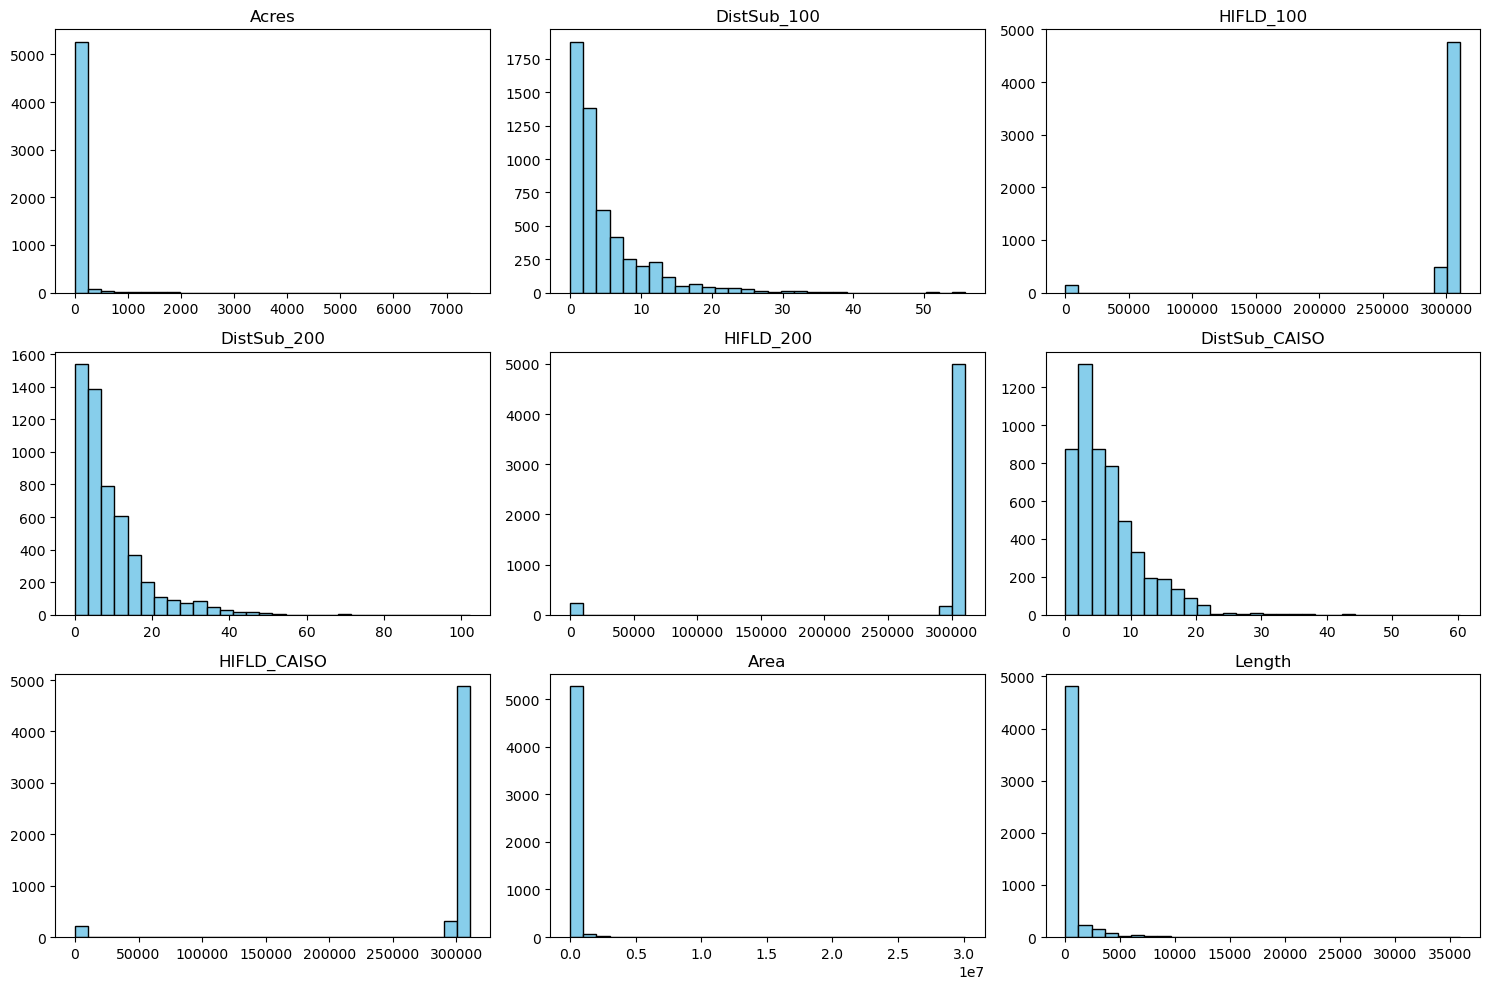

In [148]:
#plots for understanding how the distributions are:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.flatten()

#histogram
for i, col in enumerate(numeric_columns):
    axes[i].hist(solar_data[col].dropna(), bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(f'{col}')

plt.tight_layout()
plt.show()

From the above plot we can understand that the distributions of the numerical features are skewed. In this case, we can find the outliers by IQR method as this method is less sensitive to skweness.

### Finding out how many outliers are present in the features.

In [150]:
#Initializing a dictionary to store outlier indices for each column
outliers_dict = {}

for col in numeric_columns:
    #Calculate Q1 (25th percentile) and Q3 (75th percentile) for each column
    Q1 = solar_data[col].quantile(0.25)
    Q3 = solar_data[col].quantile(0.75)
    IQR = Q3 - Q1
    
    #Defining the bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    #Identifying the outliers
    outliers = solar_data[(solar_data[col] < lower_bound) | (solar_data[col] > upper_bound)].index
    outliers_dict[col] = outliers.tolist()  # Store indices of outliers for each column

    print(f"Outliers in {col}: {len(outliers)} values")

#Displaying the outliers dictionary
#print(outliers_dict)


Outliers in Acres: 768 values
Outliers in DistSub_100: 386 values
Outliers in HIFLD_100: 142 values
Outliers in DistSub_200: 350 values
Outliers in HIFLD_200: 232 values
Outliers in DistSub_CAISO: 207 values
Outliers in HIFLD_CAISO: 217 values
Outliers in Area: 768 values
Outliers in Length: 595 values


### Box plots for visual presentation of the outliers:

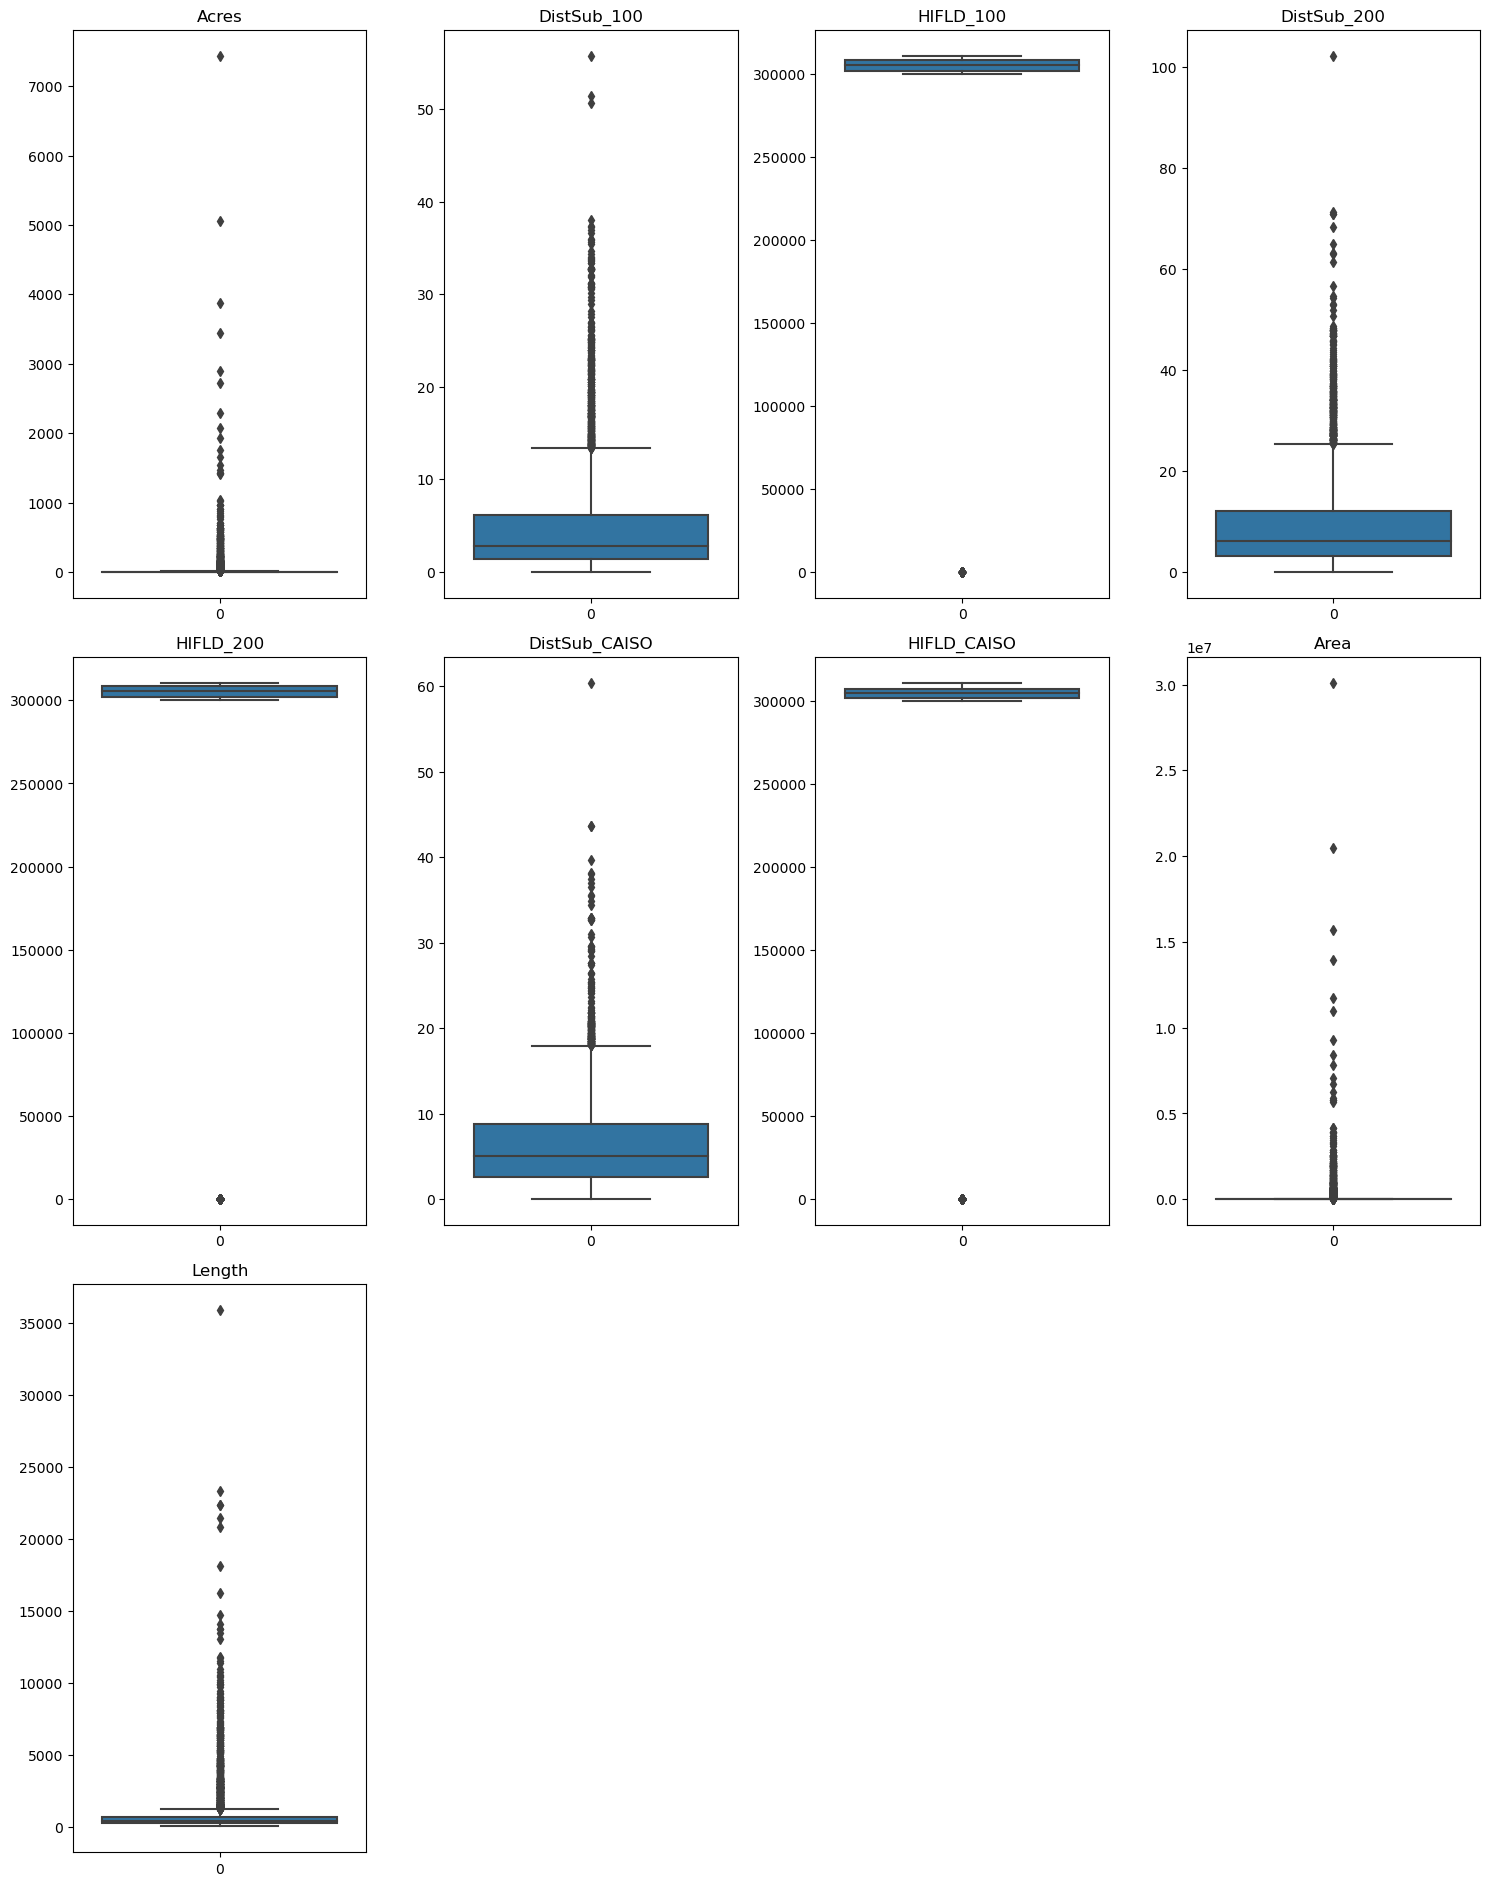

In [115]:
#plotting the box plots for visual presentation of the outliers:
import matplotlib.pyplot as plt
import seaborn as sns

columns = solar_data.columns  #column names

#defining the figure size and layout
plt.figure(figsize=(15, 25))

#Loop through each column and plot individually
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(4, 4, i)  #Adjust layout
    sns.boxplot(data=solar_data[column])
    plt.title(column)

#tight_layout
plt.tight_layout()
plt.show()


As there are many number of outliers, if we remove the records, with outliers there would be data loss. So, we are considering to cap the outliers to fall within 1.5 times the IQR from the first and third quartiles.

In [151]:
#capping the outliers by restricting values to within 1.5 times the IQR from the first and third quartiles
for col in numeric_columns:
    Q1 = solar_data[col].quantile(0.25)
    Q3 = solar_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    solar_data[col] = solar_data[col].clip(lower=lower_bound, upper=upper_bound)


### Checking if all the outliers are handled.

In [152]:
outliers_dict = {}

for col in numeric_columns:
    Q1 = solar_data[col].quantile(0.25)
    Q3 = solar_data[col].quantile(0.75)
    IQR = Q3 - Q1
    
    #Defining the bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    #Identifying outliers
    outliers = solar_data[(solar_data[col] < lower_bound) | (solar_data[col] > upper_bound)].index
    outliers_dict[col] = outliers.tolist()  # Store indices of outliers for each column

    print(f"Outliers in {col}: {len(outliers)} values")

#Displaying the outliers dictionary
#print(outliers_dict)


Outliers in Acres: 0 values
Outliers in DistSub_100: 0 values
Outliers in HIFLD_100: 0 values
Outliers in DistSub_200: 0 values
Outliers in HIFLD_200: 0 values
Outliers in DistSub_CAISO: 0 values
Outliers in HIFLD_CAISO: 0 values
Outliers in Area: 0 values
Outliers in Length: 0 values


### Box plot after the outlier removal:

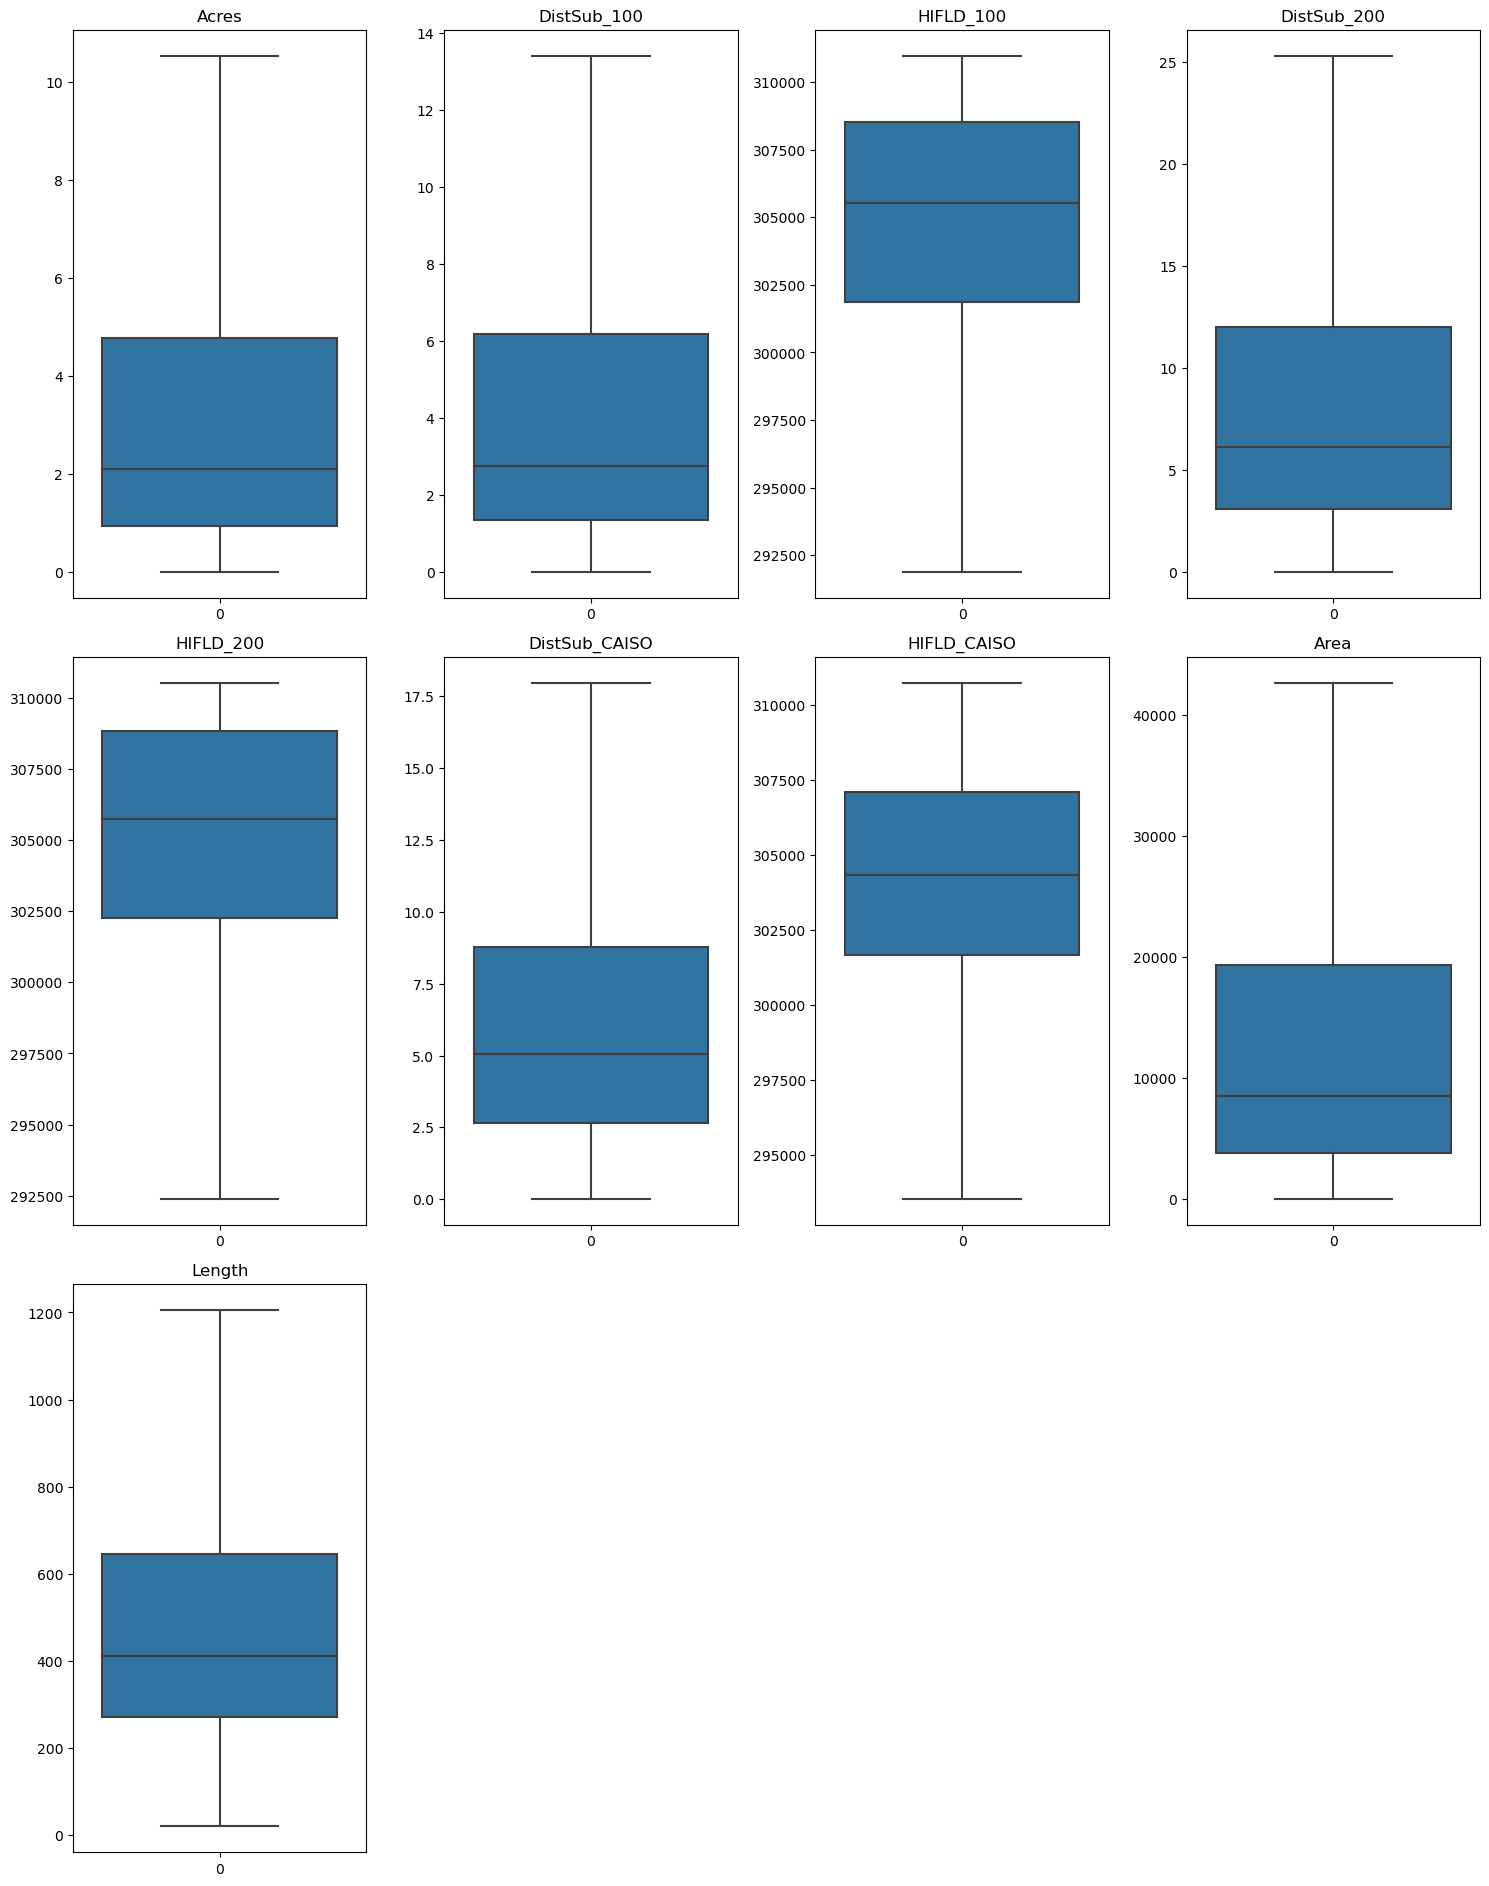

In [153]:
#plotting the box plots for visual presentation of the outliers:
import matplotlib.pyplot as plt
import seaborn as sns

columns = solar_data.columns  #column names

#defining the figure size and layout
plt.figure(figsize=(15, 25))

#Loop through each column and plot individually
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(4, 4, i)  #Adjust layout
    sns.boxplot(data=solar_data[column])
    plt.title(column)

#tight_layout
plt.tight_layout()
plt.show()

### Cleaned Solar_data Dataset

In [74]:
solar_data

,ID,County,Acres,InstallType,UrbanRural,Class,DistSub_100,Percent_100,Substation_100,HIFLD_100,...,Percent_200,Substation_200,HIFLD_200,DistSub_CAISO,Percent_CAISO,Substation_CAISO,HIFLD_CAISO,SolarTech,Area,Length
0,1,Alameda,1.672639,Rooftop,Urban,Rooftop - Urban,0.162732,0-25,Dixon Landing,309200.0,...,0-25,Los Esteros,310258,2.272283,0-25,Los Esteros,310258,Within,6768.954679,365.801336
1,2,Alameda,1.897078,Rooftop,Urban,Rooftop - Urban,0.226728,0-25,Dixon Landing,309200.0,...,0-25,Los Esteros,310258,2.392816,0-25,Los Esteros,310258,Within,7677.228982,366.909878
2,3,Alameda,1.275783,Rooftop,Urban,Rooftop - Urban,0.426104,0-25,Dixon Landing,309200.0,...,0-25,Los Esteros,310258,2.537298,0-25,Los Esteros,310258,Within,5162.935990,290.576263
3,4,Alameda,1.424286,Rooftop,Urban,Rooftop - Urban,0.491306,0-25,Dixon Landing,309200.0,...,0-25,Los Esteros,310258,2.626699,0-25,Los Esteros,310258,Within,5763.905754,344.705846
4,5,Alameda,0.984429,Rooftop,Urban,Rooftop - Urban,0.795822,0-25,Dixon Landing,309200.0,...,0-25,Los Esteros,310258,2.728629,25-50,Los Esteros,310258,Within,3983.859693,283.968425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5392,5393,Humboldt,8.027071,Ground,Urban,Ground - Urban,12.645804,75-100,Humboldt,303673.0,...,75-100,Trinity,306872,12.645804,75-100,Humboldt,303673,Within,32484.744141,975.018897
5393,5394,Imperial,10.535228,Ground,Rural,Ground - Rural,2.555937,25-50,Arkansas,305625.0,...,0-25,Sonora,306452,5.045383,25-50,Bannister,309851,Outside,42634.728954,1205.751074
5394,5395,Riverside,1.310016,Parking,Rural,Parking - Rural,6.153761,50-75,Avenue 58,300979.0,...,50-75,Coachella Valley,305826,17.974311,75-100,Devers,307400,Outside,5301.462830,331.990854
5395,5396,Riverside,0.600725,Parking,Rural,Parking - Rural,7.126165,75-100,Coachella Valley,305826.0,...,50-75,Coachella Valley,305826,17.974311,75-100,Devers,307400,Within,2431.056732,193.279911


In [154]:
#loading the dataframe as csv file to the local
solar_data.to_csv('C:\HOME\SJSU\Solar_Data\solar_data.csv', index=False) 